In [42]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('figure', figsize = [10,5])
plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 14)
plt.rc('axes', titlepad = 15)

## **Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*   Построить точечный график
*   Рассчитать коэффициенты корреляции Пирсона и Спирмена
*   Построить модель линейной регрессии
*   Рассчитать коэффициент детерминации
*   Вывести график остатков






In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArkadiyDrozdov/pyda-31_Python/main/data/water.csv')
df.info()
# данные по средней годовой смертности на # 100000 населения и концентрации кальция в питьевой воде 
# для 61 большого города в Англии и Уэльсе.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [3]:
df.head(3)
# mortality	- смертность, hardness - жесткость

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5


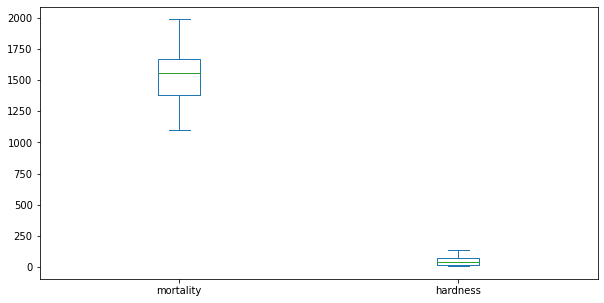

In [43]:
df[['mortality', 'hardness']].plot(kind = 'box')
plt.show()
# выбросов нет, от которых сильно зависит коэффициент корреляции

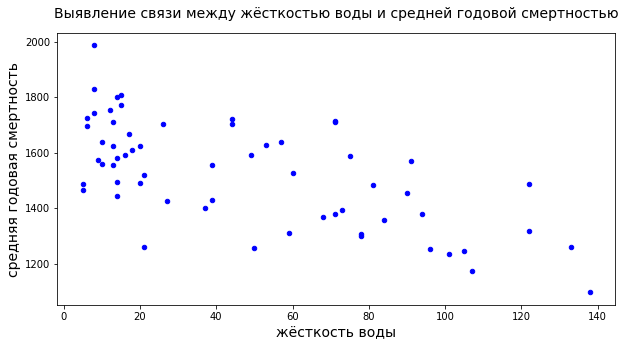

In [45]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality', color = 'blue',\
        xlabel = 'жёсткость воды', ylabel = 'средняя годовая смертность')
plt.title('Выявление связи между жёсткостью воды и средней годовой смертностью')
plt.show()

**Вывод из графика:** наибольшая средняя годовая смертность наблюдается для воды с низкой жесткостью и наоборот.

Таким образом, представленная зависимость **обратно пропорциональная**.

Хотя по моей информации, продолжительное использование жесткой воды **отрицательно** влияет на здоровье человека. Но информации о влиянии длительности использования такой воды на здоровье в исходных данных нет.

In [6]:
# линейный коэффициент корреляции Пирсона:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
# линейный коэффициент корреляции Спирмена:
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [8]:
# разница между разными коэффициентами корреляции совсем небольшая:
round(df[['mortality', 'hardness']].corr(method = 'spearman')['mortality']['hardness'] -\
df[['mortality', 'hardness']].corr()['mortality']['hardness'], 3)

0.023

Оба коэффициента корреляции, ожидаемо, получились отрицательными, что согласуется с точечным графиком. 

Взаимосвязь жесткости воды и средней годовой смертности - **обратная**.

**Построение модели линейной регрессии**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df[['hardness']] # независимая переменная, type - pandas.core.frame.DataFrame
y = df['mortality']  # зависимая переменная,   type - pandas.core.series.Series
# регрессия простая, т.к. она между двумя переменными
# форма регрессии - прямая линия y = ax + b

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_test.shape)
print(X_train.shape)

(19, 1)
(42, 1)


In [12]:
model = LinearRegression()   # линейная форма регрессии
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты уравнения прямой

print(model.coef_)
print(model.intercept_)

[-3.13167087]
1668.9722977277095


Таким образом, мы подобрали коэффициенты для уравнения прямой:  **y = -3.13 * x + 1668.97**

In [13]:
# получаем предсказанные значения смертности на основе тестовых данных жесткости воды
y_pred = model.predict(X_test) 
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

**Коэффициент детерминации:**

In [14]:
model.score(X_test, y_test)

0.5046490611017092

Видим, что коэффициент детерминации положителен и равен 0.505.

Следовательно, **наша модель** делает прогноз **лучше** чем наивная модель (оценка через среднее значение).

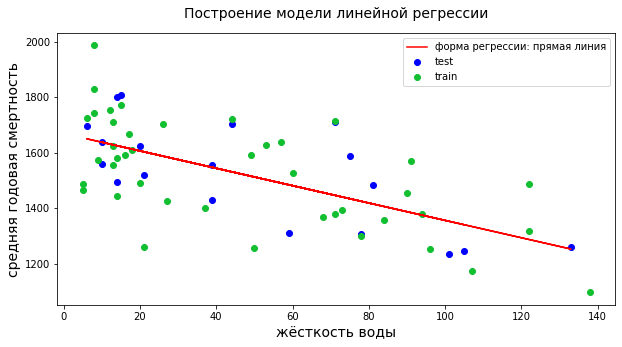

In [46]:
plt.scatter(X_test, y_test, color = 'blue', label = 'test')
plt.scatter(X_train, y_train, color = '#11bf31', label = 'train')
plt.plot(X_test, y_pred, color = '#ff0000', label = 'форма регрессии: прямая линия')
plt.legend(loc = 'best')
plt.title('Построение модели линейной регрессии')
plt.xlabel('жёсткость воды')
plt.ylabel('средняя годовая смертность')
plt.show()

В среднем все точки на диаграмме равноудалены от красной линии регрессии. Выбросов нет. 

Т.е. наша модель применима к исходным данным.

**Анализ остатков**

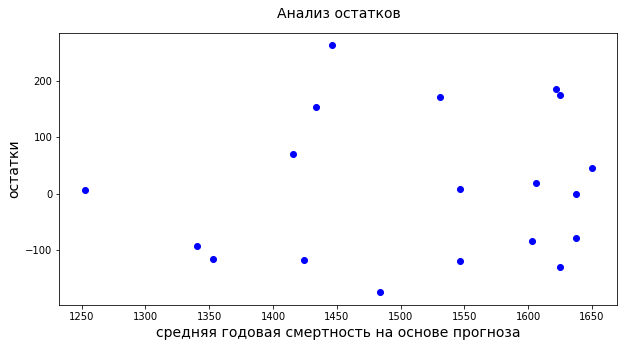

In [47]:
residuals = y_test - y_pred # считаем остатки между фактом (тестовой выборкой) и прогнозом

plt.scatter(y_pred, residuals, color = 'blue')
plt.title('Анализ остатков')
plt.ylabel('остатки')
plt.xlabel('средняя годовая смертность на основе прогноза')
plt.show()

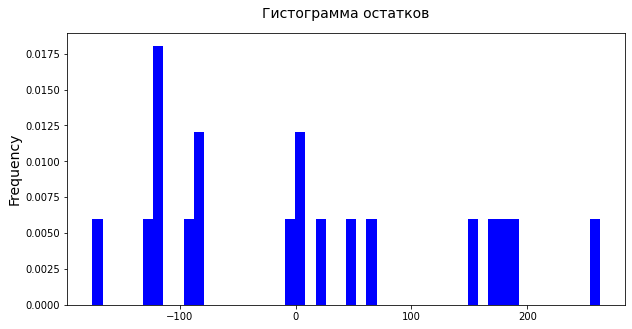

In [48]:
residuals.plot(kind = 'hist', bins = 50, density = True, color = 'blue')
plt.title('Гистограмма остатков')
plt.show()

**Вывод:** на точечном графике остатков в чередовании знаков не вижу заметных закономерностей, выбросы отсутствуют. 

Из гистограммы остатков не вижу, чтобы наша модель ошибалась достаточно хаотично.

В итоге считаю, что **связь** между жёсткостью воды и средней годовой смертностью хоть и **присутствует**, но эта связь очень слабая.

## **Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [18]:
# Первая группа - южные города
dfS = df[df.location == 'South'].drop('Unnamed: 0', axis = 1)
dfS.head(3)

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78


In [19]:
# Вторая группа - северные города
dfN = df[df.location == 'North'].drop('Unnamed: 0', axis = 1)
dfN.head(3)

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


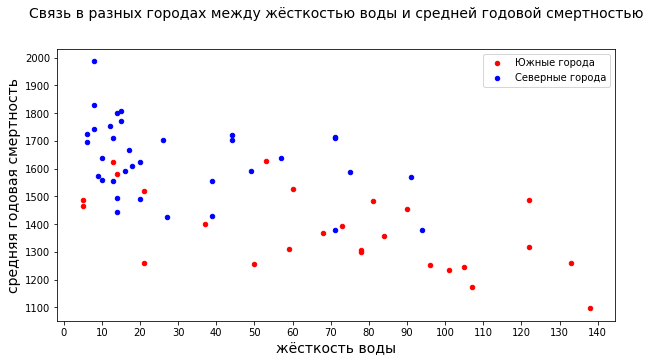

In [49]:
ax1 = dfS.plot(kind = 'scatter', x = 'hardness', y = 'mortality', \
              color = 'red', label = 'Южные города')

dfN.plot(kind = 'scatter', ax = ax1, x = 'hardness', y = 'mortality', \
          color = 'blue', label = 'Северные города')

ax1.legend(loc = 'best')
plt.title('Связь в разных городах между жёсткостью воды и средней годовой смертностью\n')
ax1.set_xlabel('жёсткость воды')
ax1.set_ylabel('средняя годовая смертность')
plt.xticks(range(0,150,10))
plt.yticks(range(1100,2100,100))
plt.show()

Из рисунка видно, что в **южных** городах жесткость воды имеет как самые высокие, так и самые низкие значения.

Также в **южных** городах практически на всем диапазоне значений жесткости воды средняя годовая смертность **ниже** чем в северных городах.

**Максимальная** же смертность наблюдается в **северных** городах для жесткости воды около 10.

**Коэффициенты корреляции по каждой группе городов:**

In [21]:
print('Коэффициент корреляции Пирсона для южных городов:')
print(dfS[['hardness', 'mortality']].corr(),'\n')

print('Коэффициент корреляции Пирсона для северных городов:')
print(dfN[['hardness', 'mortality']].corr())

Коэффициент корреляции Пирсона для южных городов:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000 

Коэффициент корреляции Пирсона для северных городов:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000


In [22]:
print('Коэффициент корреляции Спирмена для южных городов:')
print(dfS[['hardness', 'mortality']].corr(method = 'spearman'),'\n')

print('Коэффициент корреляции Спирмена для северных городов:')
print(dfN[['hardness', 'mortality']].corr(method = 'spearman'))

Коэффициент корреляции Спирмена для южных городов:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000 

Коэффициент корреляции Спирмена для северных городов:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


Коэффициенты корреляций Пирсона и Спирмена вне зависимости от географической широты городов оказались **отрицательными** (т.е. имеем обратную связь между величинами). 

Однако **оба** коэффициента лишь для **южных** городов по модулю ближе к единице.

Т.е. **линейная** связь между жёсткостью воды и средней годовой смертностью **сильнее** наблюдается в **южных** городах.

**Построение модели линейной регрессии**

In [23]:
Xs = dfS[['hardness']] # независимая переменная
Xn = dfN[['hardness']] # независимая переменная
ys = dfS['mortality'] 
yn = dfN['mortality']

In [24]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.30, random_state = 42)
print(Xs_test.shape)
print(Xs_train.shape)

(8, 1)
(18, 1)


In [25]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.30, random_state = 42)
print(Xn_test.shape)
print(Xn_train.shape)

(11, 1)
(24, 1)


In [26]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
print(model_s.coef_)
print(model_s.intercept_)

[-3.51342921]
1640.2204603423374


т.о. для **южных** городов получили уравнение прямой: **y = -3.51 * x + 1640.22**

In [27]:
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)
print(model_n.coef_)
print(model_n.intercept_)

[-1.97686226]
1688.150229031281


т.о. для **северных** городов получили уравнение прямой: **y = -1.97 * x + 1688.15**

**Коэффициент детерминации**

In [28]:
print(f'Южные города:    {model_s.score(Xs_test, ys_test)}')
print(f'Северные города: {model_n.score(Xn_test, yn_test)}')

Южные города:    -2.5519223012352077
Северные города: 0.018885304285745863


Для **южных** городов коэффициент детерминации **меньше** нуля.
Это говорит нам о том, что наша модель делает прогноз **хуже** (т.е. сильнее ошибается в прогнозе) чем наивная модель оценки через среднее значение.

Поэтому, на мой взгляд, линейная модель регрессии для **южных** городов **совсем не** подходит для описания наших данных, либо же этих данных просто не достаточно для корректного построения модели (нужно иметь исходно больше точек), или необходимо использовать другую, например, ***нелинейную*** модель регрессии. А может эти данные вообще не взаимосвязаны.

Для **северных** городов наша модель дает почти такой же результат, как и наивная, т.к. R2 имеет околонулевое положительное значение. Поэтому я считаю, что для **северных** городов наивная и линейная модели **равнозначны** по использованию.

In [29]:
# Для южных городов получаем предсказанные значения смертности на основе тестовых данных жесткости воды
ys_pred = model.predict(Xs_test) 
ys_pred

array([1286.90845133, 1653.31394337, 1340.14685615, 1286.90845133,
       1553.10047546, 1603.20720941, 1484.20371627, 1653.31394337])

In [30]:
# Для северных городов получаем предсказанные значения смертности на основе тестовых данных жесткости воды
yn_pred = model.predict(Xn_test) 
yn_pred

array([1643.91893075, 1640.78725988, 1625.12890552, 1650.18227249,
       1618.86556377, 1446.62366581, 1531.17877935, 1643.91893075,
       1546.83713371, 1621.99723465, 1546.83713371])

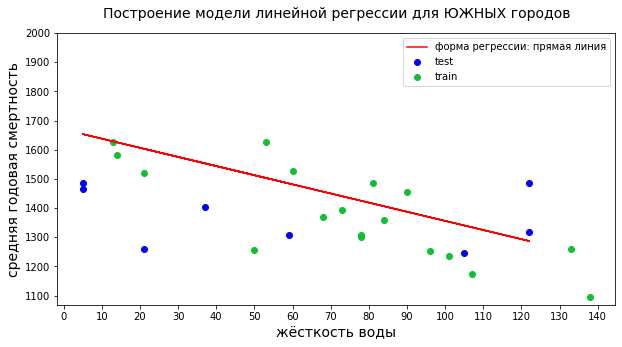

In [50]:
plt.scatter(Xs_test, ys_test, color = 'blue', label = 'test')
plt.scatter(Xs_train, ys_train, color = '#11bf31', label = 'train')
plt.plot(Xs_test, ys_pred, color = '#ff0000', label = 'форма регрессии: прямая линия')
plt.legend(loc = 'best')
plt.title('Построение модели линейной регрессии для ЮЖНЫХ городов')
plt.xlabel('жёсткость воды')
plt.ylabel('средняя годовая смертность')
plt.xticks(range(0,150,10))
plt.yticks(range(1100,2100,100))
plt.show()

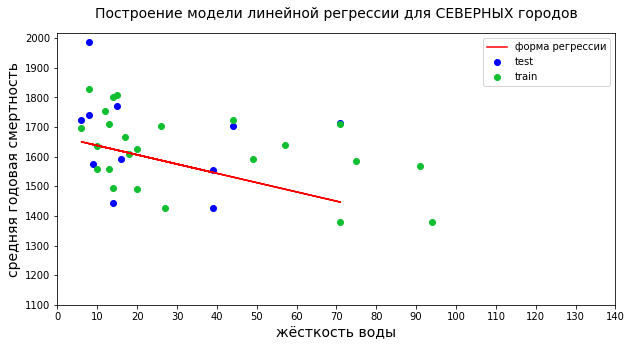

In [51]:
plt.scatter(Xn_test, yn_test, color = 'blue', label = 'test')
plt.scatter(Xn_train, yn_train, color = '#11bf31', label = 'train')
plt.plot(Xn_test, yn_pred, color = '#ff0000', label = 'форма регрессии')
plt.legend(loc = 'best')
plt.title('Построение модели линейной регрессии для СЕВЕРНЫХ городов')
plt.xlabel('жёсткость воды')
plt.ylabel('средняя годовая смертность')
plt.xticks(range(0,150,10))
plt.yticks(range(1100,2100,100))
plt.show()

Из приведенных выше двух точечных диаграмм следует, что в **южных** городах в отличие от северных **большинство** точек находятся **ниже** линии регрессии. Это подтверждает наше ранее утверждение о том, что линейную форму регрессии **не стоит** использовать при анализе данных для южных городов.

**Анализ остатков:**

In [33]:
ys_pred

array([1286.90845133, 1653.31394337, 1340.14685615, 1286.90845133,
       1553.10047546, 1603.20720941, 1484.20371627, 1653.31394337])

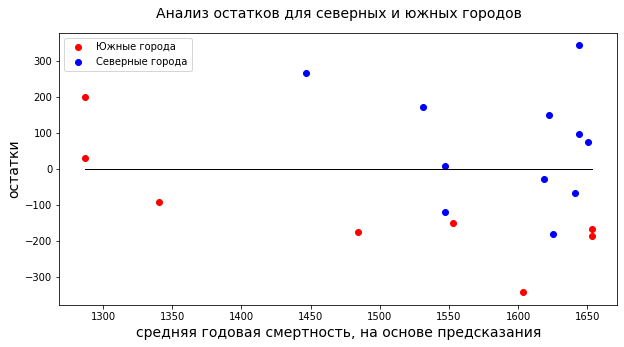

In [52]:
Sresiduals = ys_test - ys_pred # остатки между фактом и прогнозом
Nresiduals = yn_test - yn_pred 

ax1 = plt.scatter(ys_pred, Sresiduals, color = 'red', label = 'Южные города')
ax1 = plt.plot(ys_pred, np.zeros(len(ys_pred)), color = 'black', linewidth = 1)
plt.scatter(yn_pred, Nresiduals, color = 'blue', label = 'Северные города')
plt.title('Анализ остатков для северных и южных городов')
plt.legend()

plt.ylabel('остатки')
plt.xlabel('средняя годовая смертность, на основе предсказания')
plt.show()

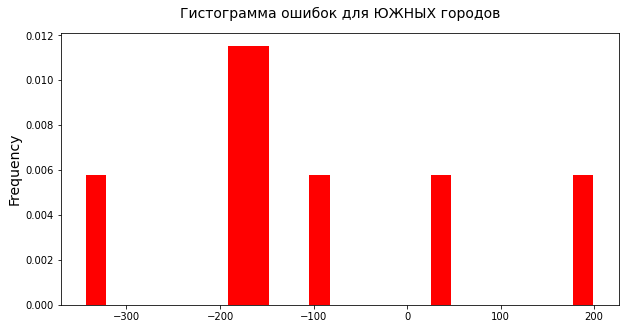

In [53]:
Sresiduals.plot(kind = 'hist', bins = 25, density = True, color = 'red')
plt.title('Гистограмма ошибок для ЮЖНЫХ городов')
plt.show()

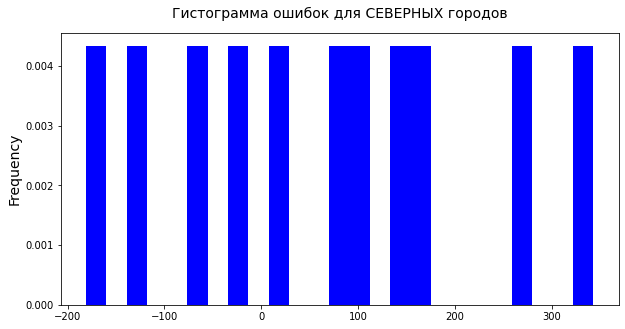

In [54]:
Nresiduals.plot(kind = 'hist', bins = 25, density = True, color = 'blue')
plt.title('Гистограмма ошибок для СЕВЕРНЫХ городов')
plt.show()

**Вывод:** 

При анализе точечной диаграммы остатков видим **закономерность в знаках** для **южных** городов: подавляющие число остатков меньше нуля, что не скажешь о северных городах.

Хаотичности остатков **не наблюдается**, на мой взгляд, из графиков гистограмм для северных и южных городов: почти везде одинаковая частота появления остатков.

Также с учетом того, что **для южных** городов коэффициент детерминации **меньше** нуля, а для северных он около нуля, можно ответить на главный вопрос задания № 2:

аналогичная зависимость между жёсткостью воды и средней годовой смертностью **не сохраняется** для северных и южных городов **по отдельности**:
* линейную форму регрессии не стоит использовать при анализе данных для южных городов;
* для северных городов линейная и наивная модели равнозначны.


Думаю, что исходных данных было немного для качественного анализа, а когда мы их еще дополнительно поделили по разным городам, данных в каждой отдельной группе стало, по-видимому, совсем мало для выявления взаимосвязи между жесткостью воды и смертностью.